In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

## Import data

In [2]:
crypto = pd.read_csv("cryptocurrencies_historical_data.csv")

crypto = crypto.set_index('Date')

crypto.index = pd.to_datetime(crypto.index)

crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-07-09 to 2023-07-08
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTCUSDT   1095 non-null   float64
 1   ETHUSDT   1095 non-null   float64
 2   XRPUSDT   1095 non-null   float64
 3   DOGEUSDT  1095 non-null   float64
 4   LTCUSDT   1095 non-null   float64
 5   ADAUSDT   1095 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


In [3]:
crypto.head(3)

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
Date,,,,,,
2020-07-09,9232.43,241.98,0.20263,0.004321,44.33,0.12403
2020-07-10,9288.34,241.26,0.19909,0.003531,44.30,0.11846
2020-07-11,9234.03,239.19,0.20110,0.003804,44.69,0.12523


In [4]:
crypto.tail(3)

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
Date,,,,,,
2023-07-06,29895.43,1846.17,0.4622,0.06485,95.25,0.2784
2023-07-07,30344.70,1870.91,0.4687,0.06540,98.23,0.2844
2023-07-08,30207.99,1861.47,0.4678,0.06537,97.77,0.2873


## Cryptocurrencies Data Exploration

In [5]:
crypto_returns = crypto.pct_change().dropna() # get daily returns 

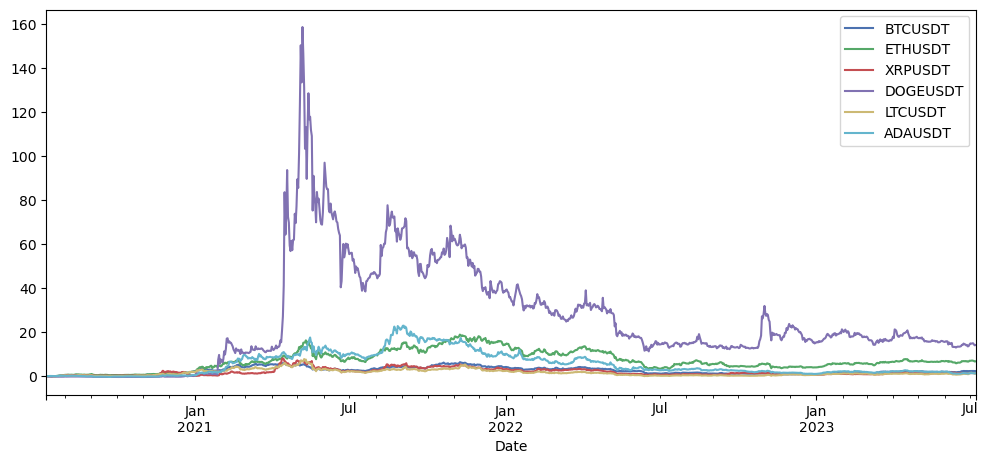

In [6]:
# Visualize cumulative returns

daily_cum_return = (1 + crypto_returns).cumprod()-1

daily_cum_return.plot(figsize = (12, 5))

plt.show()

In [7]:
# Calculate the total return : (current price - initial price)/ initial price
total_return = (crypto.iloc[-1] - crypto.iloc[0]) / crypto.iloc[0]

print(total_return)

BTCUSDT      2.271944
ETHUSDT      6.692661
XRPUSDT      1.308641
DOGEUSDT    14.127042
LTCUSDT      1.205504
ADAUSDT      1.316375
dtype: float64


In [8]:
# Annualized return : Yearly rate of return inferred from any time period.
annualized_return = ((1 + total_return)**(1/3))-1 

print(annualized_return)

BTCUSDT     0.484574
ETHUSDT     0.974053
XRPUSDT     0.321657
DOGEUSDT    1.473155
LTCUSDT     0.301675
ADAUSDT     0.323131
dtype: float64


In [9]:
# Annualized volatility(variance)

annualized_volatility = crypto_returns.var() * 365

annualized_volatility

BTCUSDT     0.447949
ETHUSDT     0.792688
XRPUSDT     1.432591
DOGEUSDT    7.431718
LTCUSDT     0.982523
ADAUSDT     1.119542
dtype: float64

### Sharpe Ratio

The sharpe ratio takes into account both the return on investment and the volatility or risk associated with that investment. 

It provides a way to compare the performance of different investments by adjusting for the amount of risk taken to achieve the returns.

Mathematically, the Sharpe ratio is calculated as follows :

<b> Sharpe Ratio = ( Return on investment - Risk Free Rate ) / Standard Deviation of Investment</b>

* Return on Investment refers to the average return or expected return of the investment or portfolio.
* Risk-Free Rate represents the return that could be achieved from a risk-free investment, such as a government bond or treasury bill, with similar time horizon.
* Standard Deviation of Investment measures the volatility or variability of the investment's returns over a specific period.


A higher Sharpe ratio indicates a better risk-adjusted performance, as it suggests that the investment generated more return per unit of risk. Conversely, a lower Sharpe ratio implies a lower risk-adjusted performance.

In [10]:
return_on_investment = annualized_return

risk_free_rate = 0.02

volatility = annualized_volatility

sharpe_ratio = (return_on_investment - risk_free_rate) / volatility

sharpe_ratio

BTCUSDT     1.037115
ETHUSDT     1.203567
XRPUSDT     0.210568
DOGEUSDT    0.195534
LTCUSDT     0.286686
ADAUSDT     0.270764
dtype: float64

<b> Interpretation of Sharpe ratios : </b>

* Based on the Sharpe ratios, the assets ETHUSDT and BTCUSDT have higher Sharpe ratios (1.288631 and 1.066562, respectively) compared to the other assets. 

* This suggests that these two assets have generated higher returns relative to their risk compared to the others.

* On the other hand, XRPUSDT, DOGEUSDT, LTCUSDT, and ADAUSDT have lower Sharpe ratios, indicating comparatively lower risk-adjusted performance.

### Sortino Ratio

Specifically designed to evaluate an investment's return relative to its downside risk or volatility.

While the Sharpe ratio considers both the upside and downside volatility of an investment, the Sortino ratio focuses only on the downside volatility, which is typically associated with losses or negative returns. 

The Sortino ratio aims to provide a more precise assessment of an investment's risk-adjusted performance by penalizing downside volatility more heavily.

The formula for calculating the Sortino ratio is as follows:

<b>Sortino ratio = (R - T) / D</b>

* R is the average return of the investment or portfolio.
* T is the target or minimum acceptable return (often set as the risk-free rate or zero).
* D is the downside deviation, which represents the volatility of returns below the target or minimum acceptable return.

The Sortino ratio is particularly useful for evaluating investments or portfolios where the focus is on minimizing downside risk or avoiding losses. 

In [11]:
return_on_investment = annualized_return

risk_free_rate = 0.02

target_return = 0.0

downside_volatility = crypto_returns[crypto_returns < target_return].var() * 365

sortino_ratio = (return_on_investment - risk_free_rate) / downside_volatility

sortino_ratio

BTCUSDT     2.110735
ETHUSDT     2.463179
XRPUSDT     0.503019
DOGEUSDT    2.039753
LTCUSDT     0.558900
ADAUSDT     0.728233
dtype: float64

<b>Interpretation of Sortino ratios</b>

* The assets DOGEUSDT and ETHUSDT have the highest Sortino ratios (2.884722 and 2.638382). These assets have generated higher returns relative to their downside risk compared to the others.

* BTCUSDT and ADAUSDT also have high Sortino ratios (2.171063 and 1.012305), suggesting good risk-adjusted performance, although lower than DOGEUSDT and ETHUSDT.

### Max Drawdown

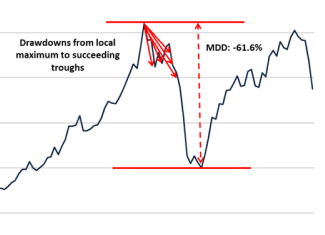

In simpler terms, drawdown represents the decline in investment value from a previous high.

It indicates the magnitude of loss an investor would have incurred if they bought the investment at its peak and sold it at its lowest point.

Max drawdown, also known as the maximum drawdown, is the largest or most significant drawdown observed during a specific period.

It represents the greatest percentage drop in investment value experienced from a peak to a subsequent trough over a particular time frame.


<b>Max Drawdown = (Peak Value - Trough Value) / Peak Value</b>

Investors generally seek investments with lower max drawdowns, as smaller drawdowns indicate less severe losses and potentially faster recovery periods. 

<b>Note :</b>
* When we see above cumulative return graph and annualized volatility(risk) we need to examine dogecoin more detailed.So I am going to calculate the max drawdown of dogecoin 

In [12]:
# Calculate the drawdowns :

drawdowns = []

peak_value = crypto["DOGEUSDT"].iloc[0]

for value in crypto["DOGEUSDT"]:
    
    if value > peak_value :
        
        peak_value = value
    
    drawdown = -(peak_value - value) / peak_value
    
    drawdowns.append(drawdown)
    
# Calculate the maximum drawdown (most bigger negative value)

max_drawdown = np.min(drawdowns) * 100 # multiply by 100 to get the percentage

max_drawdown

-92.33133281145805

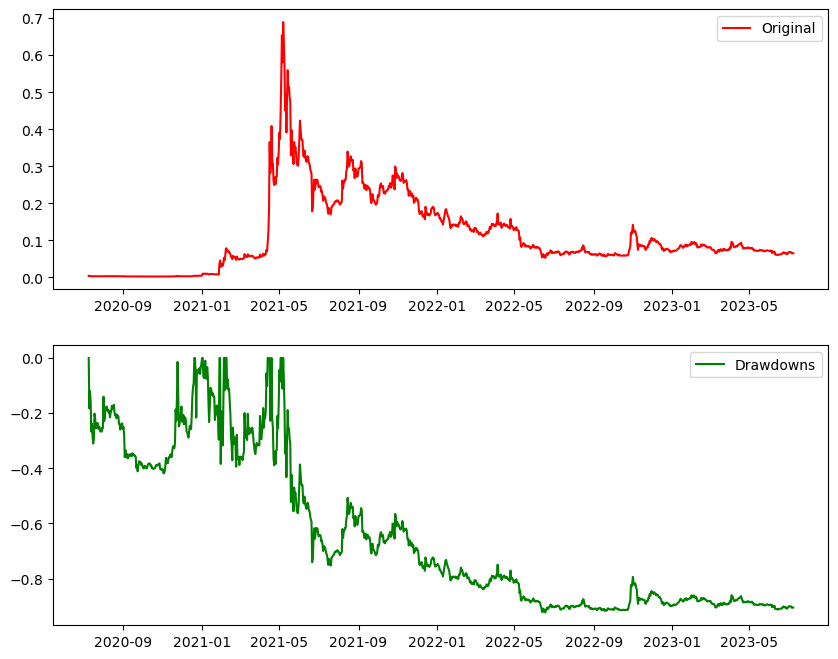

In [13]:
# Plot drawdowns and original plot.

fig, axs = plt.subplots(2, 1, figsize = (10, 8))

axs[0].plot(crypto["DOGEUSDT"], label = "Original", color = "red")
axs[1].plot(crypto.index, drawdowns, label = "Drawdowns", color = "green")

axs_ = [0, 1]

for ax in axs_:
    axs[ax].legend()

plt.show()

A drawdown of 92.33% suggests a significant loss in value, indicating a substantial drop in the asset or portfolio's performance. It could be an indicator of a prolonged and severe downturn in the investment.

Dogecoin gained popularity as a "meme" cryptocurrency, initially created as a lighthearted joke. Its value and popularity grew significantly due to online communities and celebrity endorsements. However, being primarily driven by speculative interest rather than fundamental value, Dogecoin can experience sharp drawdowns when sentiment changes, or speculative bubbles burst.

Celebrities and influential figures, such as Elon Musk and other well-known personalities, started endorsing Dogecoin on social media. Their endorsements increased its visibility and attracted more people to invest in Dogecoin, leading to a surge in its value.

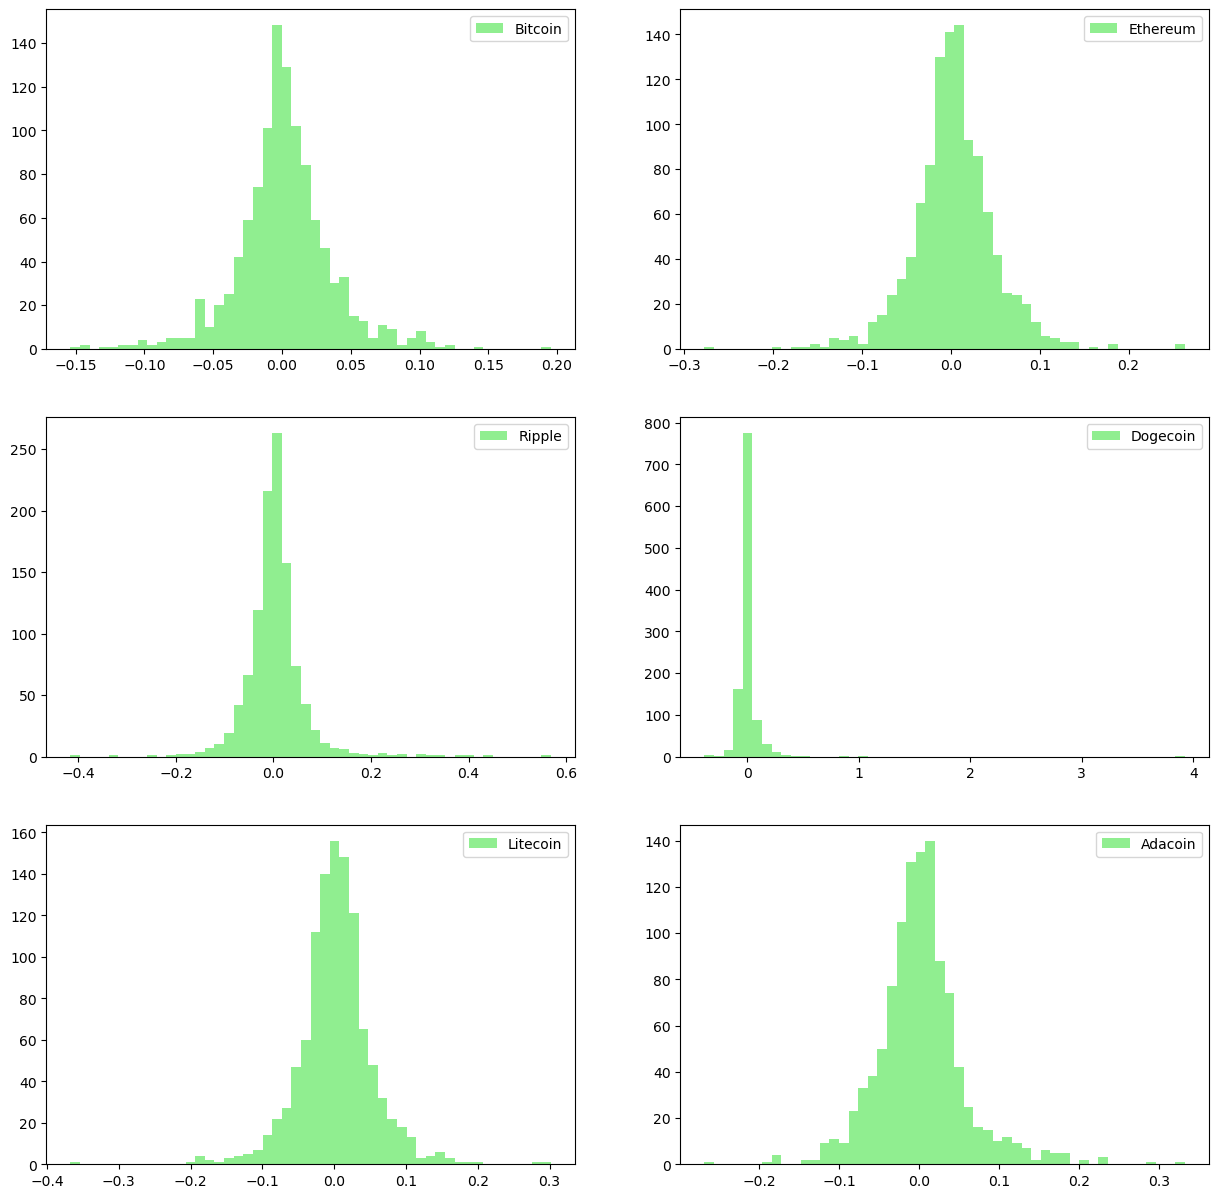

In [14]:
# Daily Returns distribution

fig, axs = plt.subplots(3, 2, figsize = (15, 15))

axs[0, 0].hist(crypto_returns["BTCUSDT"], label = "Bitcoin", bins = 50, color = "lightgreen")
axs[0, 1].hist(crypto_returns["ETHUSDT"], label = "Ethereum", bins = 50, color = "lightgreen")
axs[1, 0].hist(crypto_returns["XRPUSDT"], label = "Ripple", bins = 50, color = "lightgreen")
axs[1, 1].hist(crypto_returns["DOGEUSDT"], label = "Dogecoin", bins = 50, color = "lightgreen")
axs[2, 0].hist(crypto_returns["LTCUSDT"], label = "Litecoin", bins = 50, color = "lightgreen")
axs[2, 1].hist(crypto_returns["ADAUSDT"], label = "Adacoin", bins = 50, color = "lightgreen")


axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[2, 0].legend()
axs[2, 1].legend()


plt.show()

In [15]:
crypto_returns.describe().loc["mean": "std"]

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
mean,0.001697,0.002956,0.002651,0.007397,0.002084,0.002271
std,0.035032,0.046602,0.062649,0.142692,0.051883,0.055383


In [16]:
# Daily returns skewness
crypto_returns.skew()

BTCUSDT      0.072557
ETHUSDT      0.005281
XRPUSDT      1.619125
DOGEUSDT    19.576841
LTCUSDT     -0.081723
ADAUSDT      0.707296
dtype: float64

In [17]:
# Daily returns kurtosis
crypto_returns.kurtosis()

BTCUSDT       3.039218
ETHUSDT       3.926289
XRPUSDT      16.192173
DOGEUSDT    523.241114
LTCUSDT       5.255967
ADAUSDT       3.928576
dtype: float64

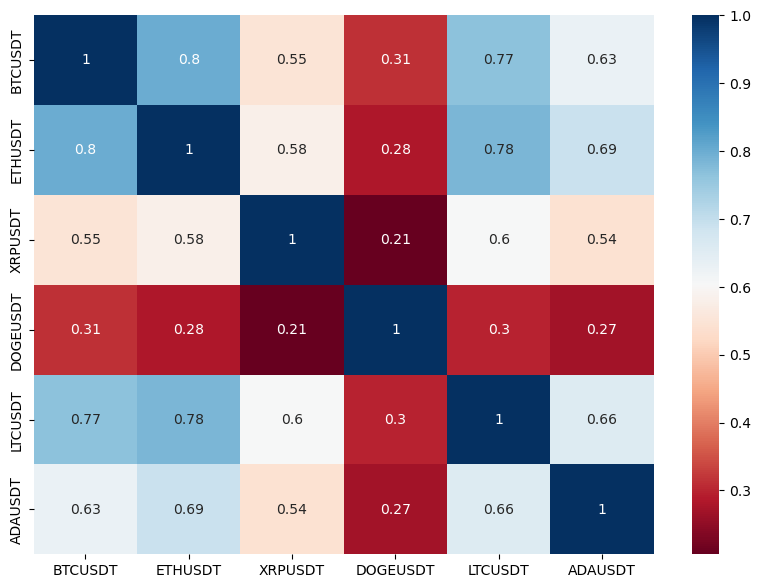

In [18]:
# Calculate correlation matrix.
correlation_matrix = crypto_returns.corr()

plt.figure(figsize = (10, 7))

sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu')

plt.show()

## Portfolio Optimization

In [19]:
# Calculate expected annualized returns and sample covariance

mu = expected_returns.mean_historical_return(crypto, frequency = 365)

mu

BTCUSDT     0.485111
ETHUSDT     0.975281
XRPUSDT     0.321994
DOGEUSDT    1.475203
LTCUSDT     0.301989
ADAUSDT     0.323470
dtype: float64

In [20]:
Sigma = risk_models.sample_cov(crypto, frequency = 365)

Sigma

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
BTCUSDT,0.447949,0.476978,0.439644,0.571842,0.508108,0.446337
ETHUSDT,0.476978,0.792688,0.618153,0.687841,0.690988,0.651165
XRPUSDT,0.439644,0.618153,1.432591,0.672029,0.717464,0.687971
DOGEUSDT,0.571842,0.687841,0.672029,7.431718,0.802945,0.775915
LTCUSDT,0.508108,0.690988,0.717464,0.802945,0.982523,0.690342
ADAUSDT,0.446337,0.651165,0.687971,0.775915,0.690342,1.119542


In [21]:
efficient_frontier = EfficientFrontier(mu, Sigma)

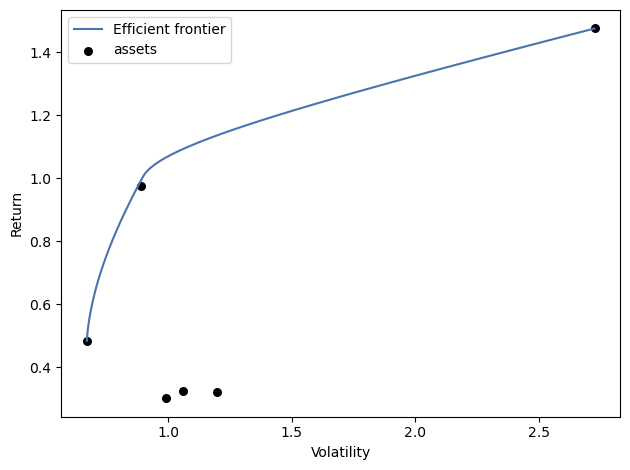

In [22]:
plotting.plot_efficient_frontier(efficient_frontier)
        
plt.show()

In [23]:
# Efficient frontier 

# Choose optimal portfolio based on maximum sharpe ratio()
def max_sharpe_portfolio_performance(mu, Sigma):
    ef = EfficientFrontier(mu, Sigma)
    
    raw_weights = ef.max_sharpe()
    
    return ef.clean_weights(), ef.portfolio_performance(verbose = True)


# Choose maximum return portfolio based on minimum volatility.
def min_volatility_portfolio_performance(mu, Sigma):
    ef = EfficientFrontier(mu, Sigma)
    
    raw_weights = ef.min_volatility(), ef.portfolio_performance(verbose = True)
    
    return ef.clean_weights()


# Select an optimal return for a target risk
def efficient_risk_portfolio_performance(mu, Sigma, risk = None):
    ef = EfficientFrontier(mu, Sigma)
    
    return ef.efficient_risk(risk), ef.portfolio_performance(verbose = True)



# Select a minimal risk for a target return
def efficient_return_portfolio_performance(mu, Sigma, rturn = None):
    ef = EfficientFrontier(mu, Sigma)
    
    return ef.efficient_return(rturn), ef.portfolio_performance(verbose = True)

In [24]:
max_sharpe_portfolio_performance(mu, Sigma)

Expected annual return: 101.3%
Annual volatility: 90.3%
Sharpe Ratio: 1.10


(OrderedDict([('BTCUSDT', 0.0),
              ('ETHUSDT', 0.92472),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 0.07528),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (1.012913285269732, 0.9031676064150325, 1.0993676901355325))

In [25]:
min_volatility_portfolio_performance(mu, Sigma)

Expected annual return: 48.4%
Annual volatility: 66.9%
Sharpe Ratio: 0.69


OrderedDict([('BTCUSDT', 0.99171),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.00829),
             ('DOGEUSDT', 0.0),
             ('LTCUSDT', 0.0),
             ('ADAUSDT', 0.0)])

In [26]:
efficient_risk_portfolio_performance(mu, Sigma, risk = 0.7)

Expected annual return: 63.2%
Annual volatility: 70.0%
Sharpe Ratio: 0.87


(OrderedDict([('BTCUSDT', 0.7122635415241114),
              ('ETHUSDT', 0.2769174832078854),
              ('XRPUSDT', 2.380191e-10),
              ('DOGEUSDT', 0.0108189746681542),
              ('LTCUSDT', 1.442169e-10),
              ('ADAUSDT', 2.206843e-10)]),
 (0.631559061323731, 0.7000000004577523, 0.8736558013197327))

In [27]:
efficient_return_portfolio_performance(mu, Sigma, rturn = 0.8)

Expected annual return: 80.0%
Annual volatility: 77.2%
Sharpe Ratio: 1.01


(OrderedDict([('BTCUSDT', 0.391461120443736),
              ('ETHUSDT', 0.5753301101406406),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 0.0332087694156235),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (0.8, 0.7715080364842378, 1.0110069670232602))

### Downside risk in the optimization

In [28]:
mu = expected_returns.mean_historical_return(crypto, frequency = 365)

mu

BTCUSDT     0.485111
ETHUSDT     0.975281
XRPUSDT     0.321994
DOGEUSDT    1.475203
LTCUSDT     0.301989
ADAUSDT     0.323470
dtype: float64

In [29]:
Sigma = risk_models.semicovariance(crypto, frequency = 365, benchmark = 0)

Sigma

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
BTCUSDT,0.204024,0.243631,0.244901,0.265531,0.267538,0.252869
ETHUSDT,0.243631,0.361225,0.338289,0.351712,0.361300,0.347695
XRPUSDT,0.244901,0.338289,0.523475,0.411176,0.393825,0.382370
DOGEUSDT,0.265531,0.351712,0.411176,0.633862,0.410491,0.392476
LTCUSDT,0.267538,0.361300,0.393825,0.410491,0.464805,0.391445
ADAUSDT,0.252869,0.347695,0.382370,0.392476,0.391445,0.447988


In [30]:
max_sharpe_portfolio_performance(mu, Sigma)

Expected annual return: 131.0%
Annual volatility: 69.2%
Sharpe Ratio: 1.86


(OrderedDict([('BTCUSDT', 0.0),
              ('ETHUSDT', 0.33067),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 0.66933),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (1.3098930844878296, 0.692210571754588, 1.863440312993573))

In [31]:
min_volatility_portfolio_performance(mu, Sigma)

Expected annual return: 48.5%
Annual volatility: 45.2%
Sharpe Ratio: 1.03


OrderedDict([('BTCUSDT', 1.0),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.0),
             ('DOGEUSDT', 0.0),
             ('LTCUSDT', 0.0),
             ('ADAUSDT', 0.0)])

In [32]:
efficient_risk_portfolio_performance(mu, Sigma, risk = 0.7)

Expected annual return: 132.4%
Annual volatility: 70.0%
Sharpe Ratio: 1.86


(OrderedDict([('BTCUSDT', 2.35898e-10),
              ('ETHUSDT', 0.302113378182161),
              ('XRPUSDT', 2.003265e-10),
              ('DOGEUSDT', 0.6978866209738306),
              ('LTCUSDT', 1.991159e-10),
              ('ADAUSDT', 2.117063e-10)]),
 (1.3241697207813137, 0.6999999999528834, 1.8630996012415664))

In [33]:
efficient_return_portfolio_performance(mu, Sigma, rturn = 0.8)

Expected annual return: 80.0%
Annual volatility: 51.8%
Sharpe Ratio: 1.50


(OrderedDict([('BTCUSDT', 0.567170199845396),
              ('ETHUSDT', 0.2273394823530645),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 0.2054903178015395),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (0.8000000000000002, 0.5183134767213182, 1.5048808009662904))

In [34]:
# Let's convert the weights into actual allocations. 
# How much many invest to each cryptocurrency ?

# Let's we decided to invest 500 dolar and we have choosed minimum volatility.

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [35]:
investment_amount = 500

mu = expected_returns.mean_historical_return(crypto, frequency=365)

Sigma = risk_models.sample_cov(crypto, frequency=365)

efficient_frontier = EfficientFrontier(mu, Sigma)

weights_minimum_volatility = efficient_frontier.min_volatility()

weights_minimum_volatility

OrderedDict([('BTCUSDT', 0.991705332840987),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.0082946671590131),
             ('DOGEUSDT', 0.0),
             ('LTCUSDT', 0.0),
             ('ADAUSDT', 0.0)])

In [36]:
efficient_frontier.portfolio_performance(verbose = True)

Expected annual return: 48.4%
Annual volatility: 66.9%
Sharpe Ratio: 0.69


(0.48375758499499005, 0.6692381943775048, 0.6929634155539441)

In [37]:
latest_prices = get_latest_prices(crypto) # to get latest prices.( Last day prices )

discrete_allocation = DiscreteAllocation(weights_minimum_volatility, latest_prices, total_portfolio_value=investment_amount)

allocation, leftover = discrete_allocation.greedy_portfolio()

print("Discrete Allocation: {}".format(allocation))
print("Funds remaining: {}".format(leftover))

Discrete Allocation: {'XRPUSDT': 8}
Funds remaining: 496.2576
